## Alaska Berry Futures
### Temperature change over time

May 19, 2023    
Using SNAP temperature models to investigate temperature thresholds for flowering and growth across Alaska   
http://data.snap.uaf.edu/data/Base/Other/Community_charts_tool_database/    
https://catalog.snap.uaf.edu/geonetwork/srv/eng/catalog.search#/metadata/b3b9581e-cccc-440f-bb2f-0fd6754d8d41    


In [1]:
import pandas as pd
import os
import numpy as np

import geopandas as gpd
from shapely.geometry import Point

import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
#pip install --upgrade pyopenssl


In [2]:
working_directory = os.getcwd()

all_temp_data =  pd.read_csv(working_directory + "\\SNAP_Community_Climate_Charts_Data_20230313.csv", skiprows=4)

In [3]:
AK_temp = all_temp_data[(all_temp_data['country']=="US")&
              (all_temp_data['type']=='Temperature')&
              (all_temp_data['scenario'].isin(['rcp85','prism']))].copy() #Also rcp45 and rcp85 available

In [4]:

# Specify the CRS of the alaska_ecoregions shapefile
crs = {'init': 'epsg:3338'}

# Load the shapefile into a GeoDataFrame and set the CRS
alaska_ecoregions = gpd.read_file(working_directory + '\\UnifiedEcoregionsAlaska2001\\akecoregions-ShapeFile\\akecoregions.shp', crs=crs)
alaska_ecoregions = alaska_ecoregions.set_crs(epsg=3338)


# Perform a spatial join between the two dataframes based on the latitude and longitude columns
communities = AK_temp[['community', 'latitude', 'longitude']]

# convert the latitude and longitude coordinates to a Point object
geometry = [Point(xy) for xy in zip(AK_temp.longitude, AK_temp.latitude)]
communities = communities.drop(['longitude', 'latitude'], axis=1)
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(communities, crs=crs, geometry=geometry)

# Reproject the alaska_ecoregions GeoDataFrame to the same CRS as the communities GeoDataFrame
alaska_ecoregions = alaska_ecoregions.to_crs(crs)

# Perform the spatial join between the two GeoDataFrames
joined_df = gpd.sjoin(geo_df, alaska_ecoregions, how="left", op="within")

AK_temp = pd.merge(AK_temp, joined_df[['community','LEVEL_2']], on='community', how='left')

C:\Users\LindseyParkinson\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\LindseyParkinson\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [5]:
joined_df['LEVEL_2'].unique()

array(['Coastal Rainforests', 'Bering Taiga', 'Aleutian Meadows',
       'Intermontane Boreal', nan, 'Alaska Range Transition',
       'Arctic Tundra', 'Bering Tundra', 'Coast Mountains Transition',
       'Pacific Mountains Transition'], dtype=object)

### Mean monthly temp

In [44]:
columns_to_drop = [col for col in AK_temp.columns if 'Min' in col or 'Max' in col]
AK_temp_mean = AK_temp.drop(columns_to_drop, axis=1)

In [45]:
# Convert the relevant columns to numeric data type
numeric_columns = ['janMean', 'febMean', 'marMean', 'aprMean', 'mayMean', 'junMean', 'julMean', 'augMean', 'sepMean', 'octMean', 'novMean', 'decMean']

AK_temp_mean[numeric_columns] = AK_temp_mean[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Group by 'LEVEL_2' and 'daterange' - find mean of regional means
regional_temp_mean = AK_temp_mean.groupby(['LEVEL_2', 'daterange'])[numeric_columns].mean()


In [49]:
#VACVIT flowers in June
regional_temp_mean['junMean'].to_list()

[14.025000000000015,
 15.52115384615385,
 17.284615384615396,
 11.27884615384614,
 10.278378378378378,
 11.718918918918915,
 13.03513513513515,
 8.243243243243224,
 7.6333333333333355,
 9.133333333333333,
 10.806666666666668,
 5.42,
 12.17790697674416,
 13.763953488372099,
 15.09302325581394,
 9.84651162790698,
 9.520689655172408,
 11.313793103448278,
 12.489655172413798,
 6.989655172413799,
 13.699999999999998,
 15.199999999999996,
 17.166666666666664,
 11.166666666666666,
 13.275324675324674,
 14.615584415584394,
 16.096103896103898,
 10.979220779220778,
 16.195744680851064,
 17.67659574468084,
 19.12021276595746,
 13.731914893617018,
 15.01538461538462,
 16.661538461538473,
 18.43846153846154,
 11.838461538461532]

## Max monthly temp

In [47]:
columns_to_drop = [col for col in AK_temp.columns if 'Min' in col or 'Mean' in col]
AK_temp_max = AK_temp.drop(columns_to_drop, axis=1)

# Convert the relevant columns to numeric data type
numeric_columns = ['janMax', 'febMax', 'marMax', 'aprMax', 'mayMax', 'junMax', 'julMax', 'augMax', 'sepMax', 'octMax', 'novMax', 'decMax']

AK_temp_max[numeric_columns] = AK_temp_max[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Group by 'LEVEL_2' and 'daterange' - find mean of regional max temps
regional_temp_max = AK_temp_max.groupby(['LEVEL_2', 'daterange'])[numeric_columns].mean()


In [48]:
#VACVIT flowers in June
regional_temp_max['junMax'].to_list()

[20.180769230769215,
 22.25961538461542,
 22.64615384615384,
 nan,
 12.862162162162162,
 14.821621621621615,
 15.932432432432435,
 nan,
 12.993333333333327,
 15.82666666666666,
 16.879999999999992,
 nan,
 17.43837209302324,
 19.852325581395345,
 20.074418604651147,
 nan,
 14.203448275862065,
 17.13103448275863,
 17.268965517241377,
 nan,
 19.133333333333336,
 22.63333333333333,
 23.166666666666668,
 nan,
 17.820779220779237,
 20.4792207792208,
 20.987012987012985,
 nan,
 23.080851063829744,
 25.340425531914885,
 25.50531914893617,
 nan,
 21.500000000000004,
 24.25384615384617,
 24.307692307692317,
 nan]

## Min monthly temp

In [7]:
columns_to_drop = [col for col in AK_temp.columns if 'Max' in col or 'Mean' in col]
AK_temp_min = AK_temp.drop(columns_to_drop, axis=1)

# Convert the relevant columns to numeric data type
numeric_columns = ['janMin', 'febMin', 'marMin', 'aprMin', 'mayMin', 'junMin', 'julMin', 'augMin', 'sepMin', 'octMin', 'novMin', 'decMin']

AK_temp_min[numeric_columns] = AK_temp_min[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Group by 'LEVEL_2' and 'daterange' - find mean of regional max temps
regional_temp_min = AK_temp_min.groupby(['LEVEL_2', 'daterange'])[numeric_columns].mean()


In [9]:
#VACVIT flowers in June
regional_temp_min['junMin'].to_list()

[8.634615384615378,
 10.636538461538466,
 11.555769230769219,
 nan,
 7.53783783783783,
 9.686486486486492,
 10.575675675675683,
 nan,
 2.7266666666666675,
 3.9933333333333323,
 5.266666666666669,
 nan,
 7.711627906976739,
 9.336046511627908,
 9.89302325581394,
 nan,
 5.537931034482756,
 7.165517241379309,
 8.006896551724136,
 nan,
 8.366666666666665,
 10.266666666666666,
 12.066666666666668,
 nan,
 8.8974025974026,
 10.866233766233764,
 12.20909090909091,
 nan,
 9.593617021276605,
 10.749999999999991,
 11.790425531914881,
 nan,
 8.93846153846154,
 10.869230769230768,
 12.753846153846151,
 nan]

In [13]:
regional_temp_min

janMin     febMin     marMin  \
LEVEL_2                      daterange                                     
Alaska Range Transition      2030-2039  -17.557692 -16.559615 -11.126923   
                             2060-2069  -15.694231 -10.678846  -7.044231   
                             2090-2099   -9.482692  -8.069231  -4.338462   
                             Historical        NaN        NaN        NaN   
Aleutian Meadows             2030-2039   -3.981081  -4.970270  -2.351351   
                             2060-2069   -2.575676  -1.872973  -0.656757   
                             2090-2099    0.591892   0.213514   1.451351   
                             Historical        NaN        NaN        NaN   
Arctic Tundra                2030-2039  -29.820000 -30.706667 -29.393333   
                             2060-2069  -22.473333 -25.066667 -23.933333   
                             2090-2099  -16.333333 -21.053333 -19.446667   
                             Historical        NaN        NaN        NaN   
Bering Taiga                 2030-2039  -17.126744 -17.088372 -13.117442   
                             2060-2069  -13.888372 -11.863953  -9.552326   
                             2090-2099   -7.450000  -8.526744  -6.327907   
                             Historical        NaN        NaN        NaN   
Bering Tundra                2030-2039  -18.651724 -20.306897 -19.906897   
                             2060-2069  -12.303448 -16.210345 -15.144828   
                             2090-2099   -7.234483 -12.368966 -11.341379   
                             Historical        NaN        NaN        NaN   
Coast Mountains Transition   2030-2039  -26.066667 -22.133333 -15.200000   
                             2060-2069  -24.733333 -17.500000 -11.000000   
                             2090-2099  -19.266667 -16.666667  -8.400000   
                             Historical        NaN        NaN        NaN   
Coastal Rainforests          2030-2039   -8.262338  -7.333766  -3.989610   
                             2060-2069   -7.070130  -2.075325  -1.416883   
                             2090-2099   -2.279221  -1.235065   0.862338   
                             Historical        NaN        NaN        NaN   
Intermontane Boreal          2030-2039  -29.302128 -26.758511 -20.389362   
                             2060-2069  -25.704255 -20.656383 -14.770213   
                             2090-2099  -19.889362 -18.336170 -11.809574   
                             Historical        NaN        NaN        NaN   
Pacific Mountains Transition 2030-2039  -27.800000 -22.869231 -15.907692   
                             2060-2069  -26.069231 -18.069231 -11.830769   
                             2090-2099  -20.646154 -16.769231  -9.369231   
                             Historical        NaN        NaN        NaN   

                                            aprMin    mayMin     junMin  \
LEVEL_2                      daterange                                    
Alaska Range Transition      2030-2039   -4.453846  3.269231   8.634615   
                             2060-2069   -0.869231  5.257692  10.636538   
                             2090-2099    1.251923  7.150000  11.555769   
                             Historical        NaN       NaN        NaN   
Aleutian Meadows             2030-2039    0.164865  4.143243   7.537838   
                             2060-2069    2.191892  5.905405   9.686486   
                             2090-2099    3.800000  7.097297  10.575676   
                             Historical        NaN       NaN        NaN   
Arctic Tundra                2030-2039  -22.093333 -8.500000   2.726667   
                             2060-2069  -15.840000 -4.933333   3.993333   
                             2090-2099  -12.173333 -3.000000   5.266667   
                             Historical        NaN       NaN        NaN   
Bering Taiga                 2030-2039   -8.012791  1.309302   7.711628   
                             2

## Melt and visualize

In [10]:
# reshape the data using melt
df = pd.melt(regional_temp_min.reset_index(), id_vars=['LEVEL_2', 'daterange'], var_name='month', value_name='temperature')

# rename the columns
df = df.rename(columns={'month': 'month_name'})

# remove the 'Mean' part from the month names
df['month_name'] = df['month_name'].str.replace('Min', '')

In [12]:
df

,LEVEL_2,daterange,month_name,temperature
0,Alaska Range Transition,2030-2039,jan,-17.557692
1,Alaska Range Transition,2060-2069,jan,-15.694231
2,Alaska Range Transition,2090-2099,jan,-9.482692
3,Alaska Range Transition,Historical,jan,NaN
4,Aleutian Meadows,2030-2039,jan,-3.981081
...,...,...,...,...
427,Intermontane Boreal,Historical,dec,NaN
428,Pacific Mountains Transition,2030-2039,dec,-25.400000
429,Pacific Mountains Transition,2060-2069,dec,-23.446154
430,Pacific Mountains Transition,2090-2099,dec,-19.861538


In [13]:
#df.to_excel("alaska_regional_temp_predictions_melt.xlsx", index=False)

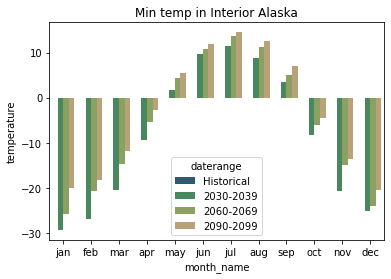

In [11]:
Interior = df[df['LEVEL_2']=='Intermontane Boreal'].copy()

# specify the order of daterange levels
daterange_order = ['Historical', '2030-2039', '2060-2069', '2090-2099']

# create the bar plot with the specified order of daterange levels
sns.barplot(data=Interior, x="month_name", y="temperature", hue="daterange", palette="gist_earth", hue_order=daterange_order)
plt.title("Min temp in Interior Alaska")
plt.savefig("interior_precipitation.png")

# Historical Data

In [26]:
historical_temp =  pd.read_csv(working_directory + "\\Historic Climate Data for AK Communities and Regions_Predicting Percent Days Above 18, 20, 25C - AK communities climate data.csv")


In [55]:
historical_temp_june = historical_temp[historical_temp['Month']==6].copy()

In [64]:
historical_temp_june.groupby(['NAME','Year'])['TMAX>=20'].sum()#.to_csv('AK_historical_temp_june_max20.csv')

In [65]:
historical_temp_june.groupby(['NAME','Year'])['TMAX>=25'].sum()#.to_csv('AK_historical_temp_june_max25.csv')

#### min temps

In [27]:
historical_temp_june_july = historical_temp[historical_temp['Month']==6|7].copy()

In [29]:
historical_temp_june_july.groupby(['NAME','Year'])['TMIN<=-3.5'].sum()#.to_csv('AK_historical_temp_june_july_min3.csv')

In [20]:
historical_temp_june_july.groupby(['NAME','Year'])['TMIN']

,STATION,NAME,DATE,Month,Year,PRCP,SNOW,SNWD,TMAX,TMIN,TMEAN,TMEAN>=18,TMEAN>=20,TMEAN>=25,TMAX>=20,TMAX>=25
181,USW00027502,"BARROW AIRPORT, AK US",7/1/1930,7,1930,0.0,0.0,NaN,11.1,-0.6,5.25,0,0,0,0,0
182,USW00027502,"BARROW AIRPORT, AK US",7/2/1930,7,1930,0.0,0.0,NaN,10.0,2.8,6.40,0,0,0,0,0
183,USW00027502,"BARROW AIRPORT, AK US",7/3/1930,7,1930,2.3,0.0,NaN,6.1,1.1,3.60,0,0,0,0,0
184,USW00027502,"BARROW AIRPORT, AK US",7/4/1930,7,1930,0.0,0.0,NaN,5.6,0.0,2.80,0,0,0,0,0
185,USW00027502,"BARROW AIRPORT, AK US",7/5/1930,7,1930,6.6,0.0,NaN,13.3,1.1,7.20,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172494,USW00026442,"VALDEZ WEATHER SERVICE OFFICE, AK US",7/27/2013,7,2013,0.0,0.0,0.0,22.2,12.2,17.20,0,0,0,1,0
172495,USW00026442,"VALDEZ WEATHER SERVICE OFFICE, AK US",7/28/2013,7,2013,0.0,0.0,0.0,23.3,10.0,16.65,0,0,0,1,0
172496,USW00026442,"VALDEZ WEATHER SERVICE OFFICE, AK US",7/29/2013,7,2013,0.0,0.0,0.0,21.7,10.0,15.85,0,0,0,1,0
172497,USW00026442,"VALDEZ WEATHER SERVICE OFFICE, AK US",7/30/2013,7,2013,0.3,0.0,0.0,21.1,12.2,16.65,0,0,0,1,0
